In [1]:
pip install git+https://github.com/LucianoPereiraValenzuela/ECC_2025_testing.git

  Cloning https://github.com/LucianoPereiraValenzuela/ECC_2025_testing.git to /tmp/pip-req-build-7ck81kd1
  Running command git clone --filter=blob:none --quiet https://github.com/LucianoPereiraValenzuela/ECC_2025_testing.git /tmp/pip-req-build-7ck81kd1
  Resolved https://github.com/LucianoPereiraValenzuela/ECC_2025_testing.git to commit 423229e004e7af3de7f3c57e337280e70f480dec
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.5/310.5 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from qiskit import QuantumCircuit
from qiskit.primitives import Estimator
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import ParameterVector
from sklearn import svm
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import random

La computación cuántica ha emergido como una disciplina clave que promete transformar muchos campos de la ciencia y la tecnología, entre ellos el aprendizaje automático. A diferencia de las computadoras clásicas, las computadoras cuánticas aprovechan principios fundamentales de la mecánica cuántica, como la superposición y el entrelazamiento, para realizar cálculos a una velocidad y escala sin precedentes. Sin embargo, aunque los algoritmos cuánticos son muy prometedores, la transición de la teoría a la práctica ha sido un desafío debido a las limitaciones actuales de los dispositivos cuánticos.

El aprendizaje automático cuántico busca fusionar la computación cuántica con las técnicas clásicas de aprendizaje automático, con la esperanza de mejorar la eficiencia y la capacidad de procesamiento en tareas como la clasificación, la regresión y el clustering. A través de la implementación de algoritmos cuánticos, se pueden resolver problemas complejos de manera más rápida que con métodos tradicionales, aunque aún queda mucho por explorar y comprender.

En este ejercicio, se utilizará el Iris Flowers Dataset, un conjunto de datos ampliamente conocido en el campo del aprendizaje automático. Este conjunto contiene características de flores de iris de tres especies diferentes, y su clasificación será el objetivo principal del ejercicio. La imagen a continuación muestra una representación de las flores del conjunto de datos:

![](https://github.com/LucianoPereiraValenzuela/ECC_2025_testing/blob/main/img/ECC_iris_flower.png?raw=true)

Este conjunto de datos servirá como base para demostrar cómo los algoritmos cuánticos pueden aplicarse a problemas de clasificación en la práctica.

El objetivo principal de este ejercicio es familiarizarse con la aplicación de algoritmos cuánticos en el aprendizaje automático, utilizando el Iris Flowers Dataset como ejemplo. Aprenderán a implementar y entrenar un modelo cuántico de clasificación, utilizando técnicas de aprendizaje automático cuántico.

Al final de este ejercicio, se espera que sean capaces de:


*   Comprender los principios básicos de la computación cuántica y su relación con el aprendizaje automático.
*   Implementar un modelo cuántico de clasificación utilizando el Iris Flowers Dataset.
*   Evaluar el desempeño de un modelo cuántico y compararlo con un modelo clásico, identificando las ventajas y desventajas de la computación cuántica en este contexto.
*   Analizar los resultados y discutir las implicancias de la computación cuántica en problemas reales de aprendizaje automático.

Analizar los resultados y discutir las implicancias de la computación cuántica en problemas reales de aprendizaje automático.
Este ejercicio no solo proporcionará una introducción al aprendizaje automático cuántico, sino también una experiencia práctica que permitirá experimentar de primera mano las diferencias entre los enfoques clásicos y cuánticos en la resolución de problemas de clasificación.

En esta etapa inicial, comenzamos por cargar el conjunto de datos de iris, un clásico en problemas de clasificación. Utilizamos la función `load_iris()` de la librería `sklearn.datasets` para obtener las 150 muestras que contienen características de flores iris, como la longitud y el ancho de los sépalos y los pétalos, clasificadas en tres especies distintas.

Una vez que los datos están cargados, es fundamental dividirlos en dos partes: el conjunto de entrenamiento y el conjunto de prueba. Esto es crucial para asegurarnos de que el modelo se entrene en una parte de los datos y luego se evalúe en otra, garantizando una evaluación justa. Para realizar esta división de manera aleatoria y eficiente, utilizamos la función `train_test_split` de `sklearn.model_selection`, configurando la división para que el $70\%$ de los datos se utilicen para entrenar el modelo y el $30\%$ restante para las pruebas.

Esta división es el primer paso en la preparación de los datos, pero no es suficiente por sí sola. A continuación, se debe aplicar un proceso adicional para garantizar que los datos estén listos para ser utilizados en los modelos de machine learning. Este proceso es el preprocesamiento de los datos.

In [3]:
# Cargar el dataset
iris = load_iris()

# Crear un DataFrame para los datos del iris
data_iris = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
data_iris['target'] = iris['target']

In [4]:
# Separamos en datos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(data_iris[iris.feature_names],
                                                    data_iris['target'],
                                                    test_size=0.30,
                                                    random_state=27)

Una vez que hemos preparado los datos dividiéndolos en conjuntos de entrenamiento y prueba, el siguiente paso es el preprocesamiento. Este proceso es esencial porque garantiza que las características de los datos estén en una escala adecuada para los modelos de clasificación.

Al igual que en muchos otros conjuntos de datos, las características de iris presentan distintas escalas, lo que podría afectar el rendimiento del modelo. Por ejemplo, la longitud del sépalo y el ancho del pétalo tienen unidades y rangos diferentes. Si no tratamos estas diferencias, algunas características podrían dominar el modelo, lo que afectaría la precisión de las predicciones.

Para solucionar este problema, utilizamos `MinMaxScaler` de `sklearn.preprocessing` para normalizar las características. El `MinMaxScaler` transforma las características de modo que sus valores queden en un rango de $[0, 1]$, lo que asegura que ninguna característica tenga un peso desproporcionado debido a su escala. Este paso es particularmente útil para algoritmos como el SVM, que son sensibles a la escala de las características. Al aplicar el `MinMaxScaler` tanto al conjunto de entrenamiento como al de prueba, garantizamos que ambos conjuntos estén en la misma escala, lo que permite entrenar y evaluar el modelo de manera coherente.

En resumen, el preprocesamiento con `MinMaxScaler` asegura que las características estén alineadas en el mismo rango, lo que optimiza el desempeño de los modelos de machine learning, especialmente aquellos que dependen de la escala de las variables.

In [5]:
# Normalizamos los datos de entrenamiento y prueba
scaler = MinMaxScaler()

# Ajustar y transformar los datos de entrenamiento
X_train = scaler.fit_transform(X_train)

# Transformar los datos de prueba utilizando los mismos parámetros
X_test = scaler.transform(X_test)

Ahora nos centraremos en la optimización del circuito cuántico. El objetivo es ajustar los parámetros del circuito para lograr un rendimiento óptimo, maximizando la fidelidad de la operación que se está modelando. Para ello, se construye un circuito cuántico parametrizado que permite aplicar rotaciones sobre los qubits de manera controlada, permitiendo que cada uno de ellos evolucione bajo diferentes parámetros de ajuste.

A través de la parametrización de las puertas cuánticas, específicamente utilizando puertas de rotación como $RX$ y $RY$, se crea un circuito flexible en el que los parámetros pueden ajustarse durante la ejecución. Este enfoque es fundamental para aplicar el optimizador que ajustará el circuito de manera eficiente.

Una vez definido el circuito cuántico parametrizado, aplicamos una serie de puertas de interacción, como las puertas $CNOT$ (controladas), para generar las interacciones necesarias entre los qubits, lo que permite el entrelazamiento y la superposición en el estado cuántico final.

La optimización se realiza ajustando los parámetros definidos en el circuito para mejorar el desempeño del modelo, utilizando algoritmos clásicos que minimizan una función de costo. Este proceso es crucial para lograr un circuito eficiente que, una vez entrenado, sea capaz de realizar cálculos cuánticos precisos y útiles.

In [6]:
# construimos circuito parametrico
def optimized_quantum_circuit():

    # Se construye un circuito cuántico de 4 qubits
    qc_dato = QuantumCircuit(4)

    # Definimos un conjunto de parámetros que serán ajustados
    theta = ParameterVector('θ', 4)

    # Aplicamos puertas Hadamard para generar superposición
    qc_dato.h([0,1,2,3])

    # Aplicamos puertas de rotación RX y RY para modificar el estado de los qubits
    qc_dato.rx(2 * theta[0], 0)
    qc_dato.ry(2 * theta[1], 1)
    qc_dato.ry(2 * theta[2], 2)
    qc_dato.ry(2 * theta[3], 3)

    # Realizamos puertas CX (controladas) entre pares de qubits
    qc_dato.cx(0,1)
    qc_dato.rx(2 * np.pi - abs(theta[0] - theta[1]),1)
    qc_dato.cx(0,1)

    qc_dato.cx(0,2)
    qc_dato.ry(2 * np.pi - abs(theta[0] - theta[2]),2)
    qc_dato.cx(0,2)

    qc_dato.cx(1,2)
    qc_dato.rx(2 * np.pi - abs(theta[1] - theta[2]),2)
    qc_dato.cx(1,2)

    qc_dato.cx(0,3)
    qc_dato.rx(2 * np.pi - abs(theta[0] - theta[3]),3)
    qc_dato.cx(0,3)

    qc_dato.cx(1,3)
    qc_dato.rx(2 * np.pi - abs(theta[1] - theta[3]),3)
    qc_dato.cx(1,3)

    qc_dato.cx(2,3)
    qc_dato.rx(2 * np.pi - abs(theta[2] - theta[3]),3)
    qc_dato.cx(2,3)


    ####

    return qc_dato
    ###

El circuito optimizado se visualiza utilizando la representación gráfica del circuito cuántico. Este paso es esencial para comprobar que las puertas y los parámetros están siendo aplicados correctamente y que el circuito está listo para ser utilizado en los pasos siguientes del proceso, como la evaluación de similitudes cuánticas a través del swap test.

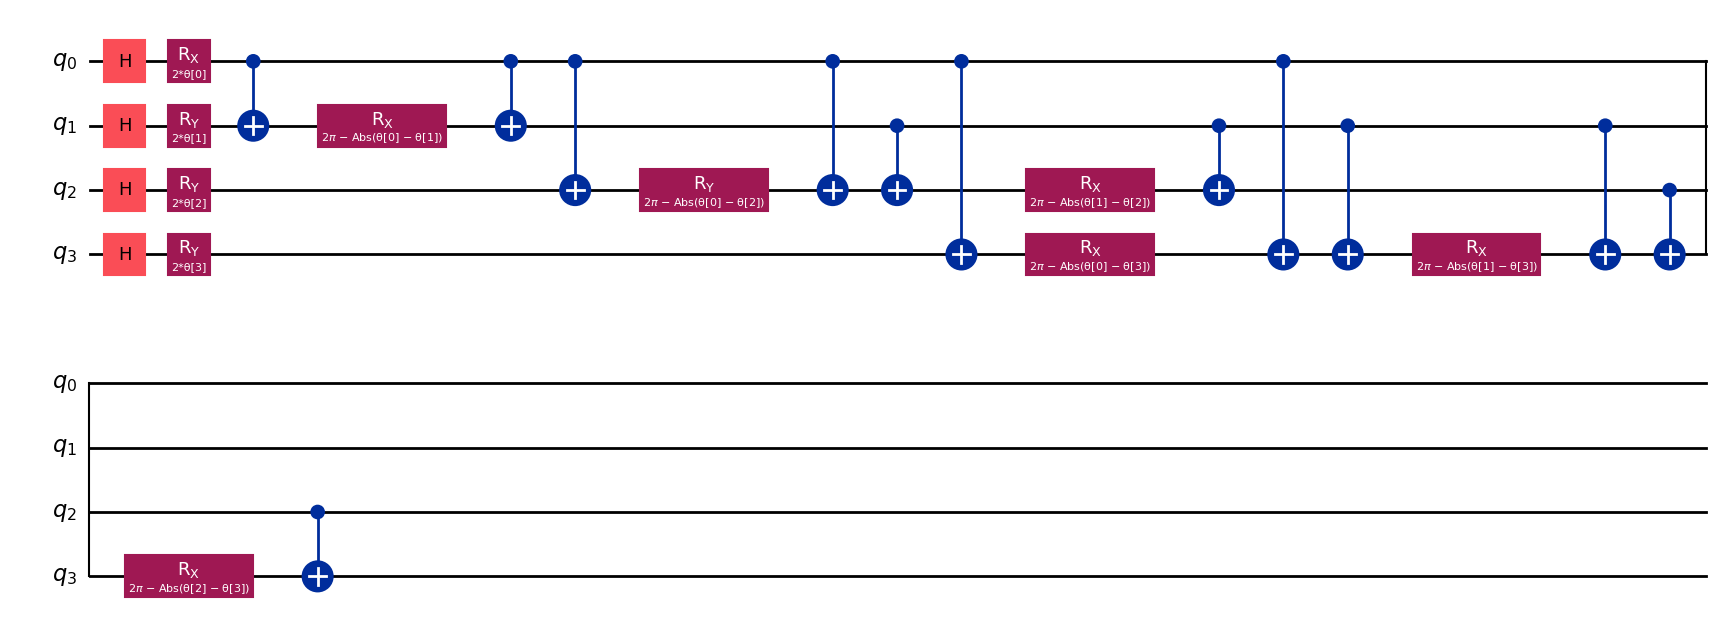

In [7]:
qc_optimizado = optimized_quantum_circuit()

qc_optimizado.draw('mpl')

In [8]:
## no lo quite dado que no se si t sirve

# # esto va en el archivo de comprobacion de respuestas
# def test_7a(qc_dato):
#     sol = True
#     if qc_dato.num_qubits == 4 :
#         pass
#     else:
#         print('Tu circuito no tiene parametros.')
#         sol = False
#     if qc_dato.num_parameters == 0 :
#         print('Tu circuito no tiene parametros.')
#         sol = False
#     elif qc_dato.num_parameters > 4:
#         print('Tu circuito tiene muchos parametros')
#         sol = False

#     for op in qc_dato.count_ops().keys():
#         if op in [ 'h', 'rz', 'cx' ]:
#             pass
#         else:
#             print('Estas usando una puerta no permitida.')

#     if sol:
#         print('Tu circuito es correcto')


In [9]:
# test_7a(qc_optimizado)

Una vez que hemos completado la optimización del circuito cuántico, el siguiente paso en el proceso es aplicar el Swap Test. Este test cuántico es fundamental para comparar dos estados cuánticos y medir su similitud. El Swap Test se basa en un qubit auxiliar que se coloca en un estado de superposición, utilizando la puerta Hadamard, seguida de una serie de puertas controladas de intercambio (CSWAP) entre los qubits de los dos estados que queremos comparar.

![](https://github.com/LucianoPereiraValenzuela/ECC_2025_testing/blob/main/img/ECC2025_swap_test.png?raw=true)

En nuestra implementación, hemos diseñado la función `kernel_element` para realizar este Swap Test en dos conjuntos de datos. El procedimiento comienza con la creación de un circuito cuántico de 9 qubits, donde los circuitos de los dos datos a comparar, se incorporan al test. Esto se realiza asignando los parámetros del circuito cuántico optimizado a cada uno de los conjuntos de datos.

El propósito de esta función es medir la similitud entre los estados cuánticos generados por los dos conjuntos de datos. Mediante la aplicación de puertas CSWAP, comparamos los estados y obtenemos un valor que refleja la probabilidad de que los dos estados sean iguales. Este valor de similitud es esencial para construir un Quantum Kernel, ya que proporciona la métrica que necesitamos para evaluar las relaciones entre los datos en el espacio cuántico.




In [10]:
# contruimos un circuito de swap test
def kernel_element( dato_1, dato_2,
                    backend=Estimator(options={'seed':1}), shots=1000  ):

    value = 0 # resultado por defecto
    # Se define un circuito cuántico de 9 qubits
    qc_swap_test = QuantumCircuit( 9 )

    # Preparamos los circuitos cuánticos para los datos
    qc_dato1 = qc_optimizado.copy().assign_parameters( dato_1)
    qc_dato2 = qc_optimizado.copy().assign_parameters( dato_2)

    # Combinamos los circuitos cuánticos de los dos datos a comparar
    qc_swap_test.compose( qc_dato1, qubits=[1,2,3,4], inplace=True )
    qc_swap_test.compose( qc_dato2, qubits=[5,6,7,8], inplace=True )

    # Se agrega la puerta Hadamard al qubit auxiliar
    qc_swap_test.h(0)

    # Aplicación de las puertas Controlled-Swap (CSWAP) entre qubits
    qc_swap_test.cswap(0,1,5)
    qc_swap_test.cswap(0,2,6)
    qc_swap_test.cswap(0,3,7)
    qc_swap_test.cswap(0,4,8)

    # Aplicamos nuevamente la puerta Hadamard al qubit auxiliar
    qc_swap_test.h(0)

    # Ejecutamos el circuito cuántico y obtenemos los resultados
    job= backend.run(qc_swap_test,SparsePauliOp(['IIIIIIIIZ'],[1]),shots=shots)
    value=job.result().values[0]


    return qc_swap_test, value

<ipython-input-10-3aca36f28c29>:3: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  backend=Estimator(options={'seed':1}), shots=1000  ):


1.000000000230297


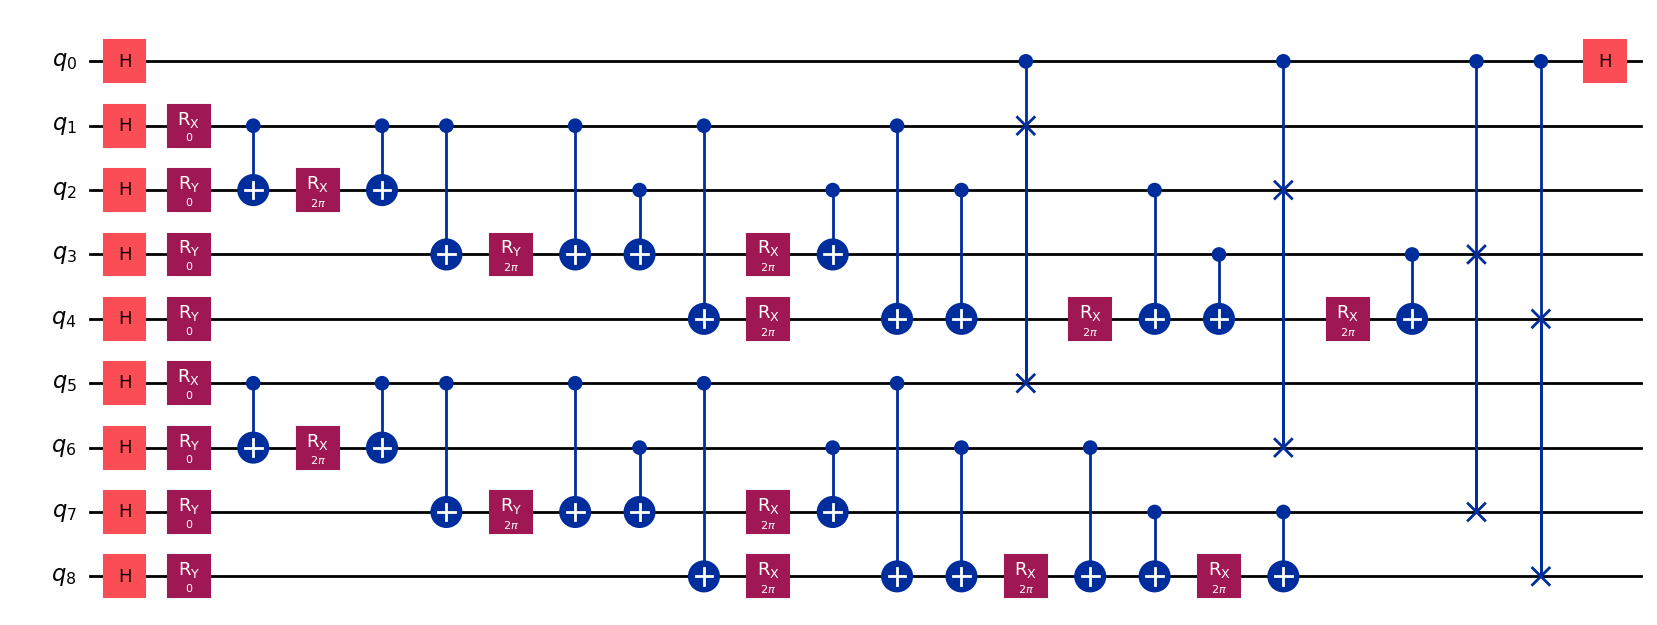

In [11]:
qc_swap_test, value = kernel_element( np.zeros(4), np.zeros(4) )
print( value )
qc_swap_test.draw('mpl')

Una vez que hemos implementado el Swap Test, el siguiente paso en la construcción de nuestro modelo cuántico es calcular el kernel cuántico, que es fundamental para evaluar la similitud entre los datos de entrenamiento y los de prueba. Para ello, utilizamos la función `Quantum_Kernel` que toma como entrada los datos de entrenamiento y prueba.

La función `Quantum_Kernel` construye una matriz de similitudes cuánticas utilizando el Swap Test previamente definido. Primero, la función inicializa una matriz de ceros con dimensiones correspondientes a la cantidad de datos de prueba y de entrenamiento. Luego, itera sobre los datos de prueba y entrenamiento, calculando la similitud entre cada par de datos utilizando el `kernel_element`, que ejecuta el Swap Test para cada par.

Este enfoque permite que, en lugar de usar métodos clásicos para calcular las similitudes, aprovechemos las capacidades de la computación cuántica para extraer relaciones más profundas entre los datos. La matriz resultante de similitudes cuánticas es esencial para realizar análisis más avanzados, como la clasificación o la regresión cuántica, que puede beneficiarse de las propiedades únicas del kernel cuántico.

In [12]:
# construimos kernel cuantico
def Quantum_Kernel( X_train, X_test=None,
                    backend=Estimator(options={'seed':1}), shots=1000 ):
    """
    X_train : vector bidimensional para entrenar
    X_test  : vector bidimensional para testear
    K_q     : Kernel cuantico
    backend : simulador o computador cuantico
    shots   : numero de shots
    """

    if X_test is None:
        X_test = X_train
    X_train = np.array(X_train)
    X_test  = np.array(X_test)

    # Inicializar la matriz de similitudes cuánticas
    K_q = np.zeros(( X_test.shape[0], X_train.shape[0]))

    values = []
    for x_test in X_test:
        for x_train in X_train:
            # Calcular el valor del kernel cuántico (swap test) entre los datos
            values.append( kernel_element( x_train, x_test,
                                            backend=backend, shots=shots )[1]  )

    l = 0
    for j, x_test in enumerate( X_test ):
        for k, x_train in enumerate( X_train):
            K_q[j,k] = values[l]
            l += 1

    return K_q

<ipython-input-12-04013155340f>:3: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  backend=Estimator(options={'seed':1}), shots=1000 ):


El uso del Quantum Kernel en el contexto de los algoritmos de aprendizaje automático cuántico permite llevar a cabo tareas de clasificación y regresión basadas en las similitudes cuánticas entre los datos. Al contar con este kernel, podemos aplicar técnicas clásicas de machine learning, como máquinas de soporte vectorial (SVM) cuánticas, que aprovechan estas similitudes para realizar tareas de clasificación de manera más eficiente y precisa.

Este enfoque cuántico mejora significativamente la capacidad de nuestros modelos para aprender patrones complejos en los datos, aprovechando las propiedades únicas de la computación cuántica, como la superposición y la interferencia. La generación del Quantum Kernel es un paso crucial hacia la implementación de modelos de aprendizaje automático cuántico que puedan superar las limitaciones de los métodos clásicos.



Una vez que se han generado las matrices de similitudes cuánticas, el siguiente paso es visualizarlas. Para ello, calculamos las matrices `Kq_train` y `Kq_test` utilizando la función `Quantum_Kernel`. Estas matrices representan las similitudes entre los datos de entrenamiento y prueba. Al calcular estas matrices, tenemos una representación de la relación cuántica entre las muestras, que puede capturar patrones complejos que no serían evidentes en un enfoque clásico.

In [13]:
Kq_train = Quantum_Kernel( X_train )
Kq_test  = Quantum_Kernel( X_train, X_test )

Después de calcular las matrices de similitud cuántica, es necesario representarlas gráficamente para observar su estructura. Esto se logra utilizando herramientas de visualización como matplotlib, lo que permite entender mejor cómo se relacionan las muestras entre sí en el espacio cuántico. En este caso, representamos dos matrices: una para los datos de entrenamiento y otra para los datos de prueba. Este paso es esencial para interpretar la distribución de las similitudes y cómo varían con respecto a las muestras de prueba.

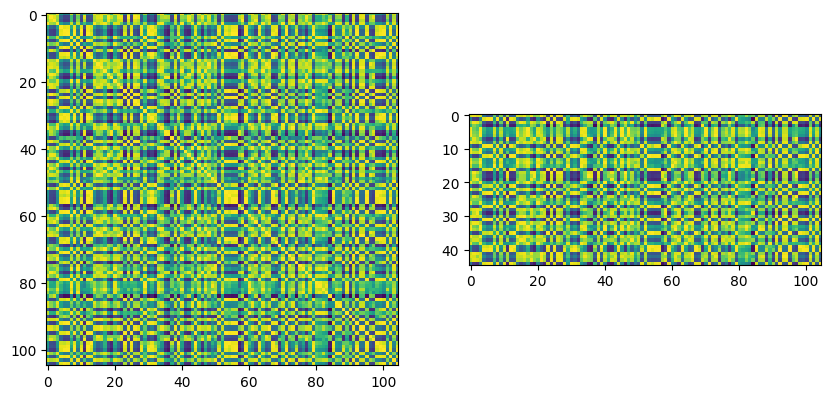

In [14]:
# Visualización de las matrices de similitudes
fig, ax = plt.subplots( 1, 2, figsize=(10,5) )
ax[0].imshow( Kq_train )
ax[1].imshow( Kq_test )

Además, estas matrices de similitud cuántica también pueden considerarse como matrices de Gram cuánticas, ya que están asociadas a la representación cuántica de las muestras y capturan su estructura y relaciones en un espacio de alta dimensionalidad. Las matrices de Gram son fundamentales en el contexto de los métodos de aprendizaje automático, ya que permiten representar las relaciones entre todas las muestras sin tener que calcular explícitamente las interacciones en el espacio de características original.

Luego de obtener las matrices de similitud cuántica para los conjuntos de entrenamiento y prueba, podemos proceder con el entrenamiento y evaluación del modelo SVM cuántico. Este modelo utiliza las matrices de Gram cuánticas generadas previamente como el kernel, con el objetivo de clasificar los datos de manera eficiente en un espacio de características cuánticas.

En este paso, entrenamos un clasificador SVM utilizando el kernel cuántico precomputado, que es una función basada en el swap test. El modelo se ajusta a los datos de entrenamiento y luego se evalúa sobre los datos de prueba para determinar su desempeño en términos de fidelidad y métricas de clasificación.

Es importante también realizar una visualización de la matriz de confusión, la cual nos ayudará a entender cómo el modelo está clasificando correctamente o erróneamente los datos de prueba.

In [15]:
# esto va en el archivo de comprobacion de respuestas
def test_7c( Kq_train, y_train, Kq_test, y_test ):
    svm = SVC( kernel = 'precomputed' )
    svm.fit( Kq_train, y_train )
    Y_pred_quantum = svm.predict( Kq_test )
    # print( 'Fidelidad test:        ', svm.score( Kq_test, y_test ) )
    # if svm.score( Kq_test, y_test ) > 0.97:
    #     print('Tu discrimindor alcanza una calidad superior al 97%.')
    # else:
    #     print('Vuelve a los desafios anteriores para intentar mejorar tu discriminador.')
    quantum = confusion_matrix(y_test, Y_pred_quantum)

    ConfusionMatrixDisplay(confusion_matrix=quantum).plot();
    print(classification_report(y_test, Y_pred_quantum))

    return None

Este código entrena un clasificador SVM con un kernel cuántico precomputado y evalúa el desempeño en los datos de prueba, mostrando la fidelidad del modelo y una matriz de confusión que representa las predicciones del modelo frente a los valores reales. Además, se muestra un informe de clasificación con métricas como la precisión, recall y F1-score.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.94      0.94      0.94        16
           2       0.94      0.94      0.94        17

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



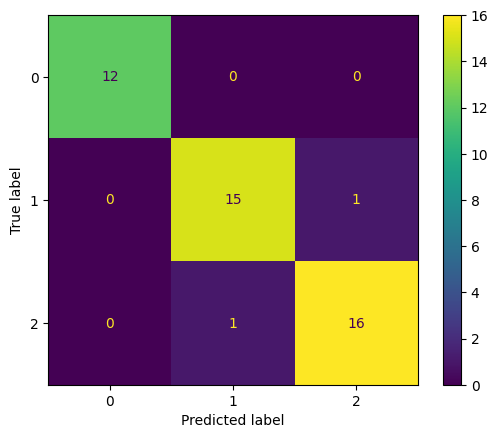

In [16]:
test_7c( Kq_train, y_train, Kq_test, y_test )

Una parte fundamental del análisis consiste en comparar el desempeño de los modelos cuánticos con los modelos clásicos. Para este propósito, entrenamos y evaluamos modelos SVM clásicos utilizando diferentes kernels estándar, como el kernel lineal, el kernel radial (RBF), y el kernel polinómico.

Cada uno de estos modelos se ajusta a los datos de entrenamiento y se evalúa en el conjunto de prueba. Posteriormente, se calculan métricas como la fidelidad del modelo y se visualizan las matrices de confusión para analizar el comportamiento de cada kernel. Este análisis comparativo permite identificar las ventajas y limitaciones de los modelos cuánticos en relación con los clásicos, destacando las condiciones en las que cada enfoque resulta más efectivo.

In [17]:
def ker_lineal( X_train, y_train, X_test, y_test ):
    svm = SVC( kernel = 'linear' )
    svm.fit( X_train, y_train )
    Y_pred_quantum = svm.predict( X_test )
    # print( 'Fidelidad test:        ', svm.score( X_test, y_test ) )

    quantum = confusion_matrix(y_test, Y_pred_quantum)

    ConfusionMatrixDisplay(confusion_matrix=quantum).plot();
    print(classification_report(y_test, Y_pred_quantum))

    return None

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.88      0.94      0.91        16
           2       0.94      0.88      0.91        17

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45



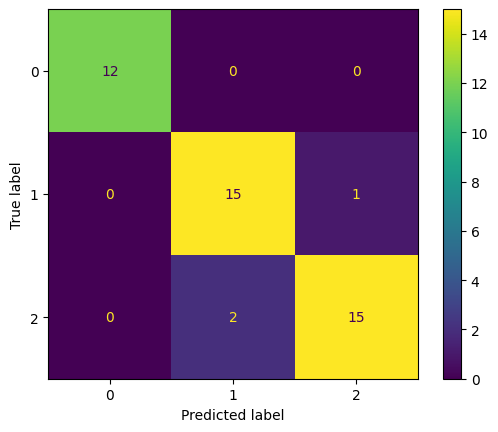

In [18]:
ker_lineal( X_train, y_train, X_test, y_test )

In [19]:
def ker_rbf( X_train, y_train, X_test, y_test ):
    svm = SVC( kernel = 'rbf' )
    svm.fit( X_train, y_train )
    Y_pred_quantum = svm.predict( X_test )
    # print( 'Fidelidad test:        ', svm.score( X_test, y_test ) )

    quantum = confusion_matrix(y_test, Y_pred_quantum)

    ConfusionMatrixDisplay(confusion_matrix=quantum).plot();
    print(classification_report(y_test, Y_pred_quantum))

    return None

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.88      0.88      0.88        16
           2       0.88      0.88      0.88        17

    accuracy                           0.91        45
   macro avg       0.92      0.92      0.92        45
weighted avg       0.91      0.91      0.91        45



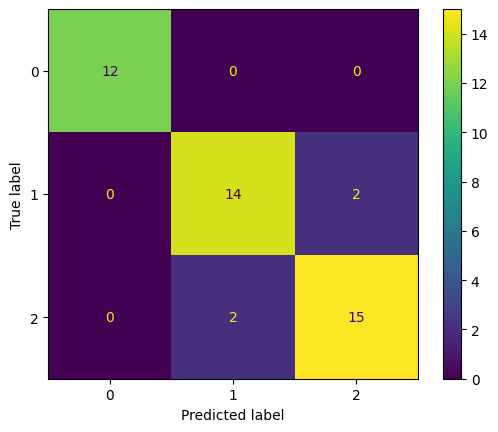

In [20]:
ker_rbf( X_train, y_train, X_test, y_test )

In [21]:
def ker_poly( X_train, y_train, X_test, y_test ):
    svm = SVC( kernel = 'poly' )
    svm.fit( X_train, y_train )
    Y_pred_quantum = svm.predict( X_test )
    # print( 'Fidelidad test:        ', svm.score( X_test, y_test ) )

    quantum = confusion_matrix(y_test, Y_pred_quantum)

    ConfusionMatrixDisplay(confusion_matrix=quantum).plot();
    print(classification_report(y_test, Y_pred_quantum))

    return None

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.88      0.88      0.88        16
           2       0.88      0.88      0.88        17

    accuracy                           0.91        45
   macro avg       0.92      0.92      0.92        45
weighted avg       0.91      0.91      0.91        45



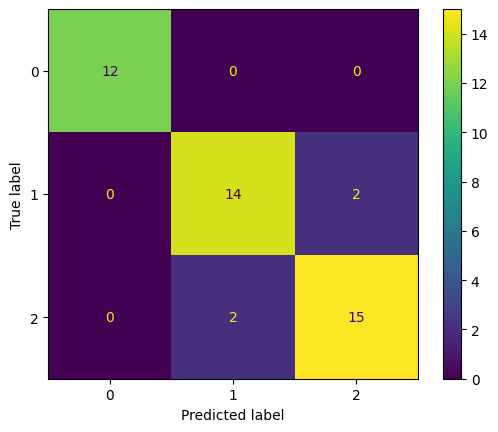

In [22]:
ker_poly( X_train, y_train, X_test, y_test )

falta hacer las comparativas el kernel como se contruyo depende prinicpalmente de su circuito parametrico

si se aplica este kernel pero con otro ramdom_state(ejemplo 0, 42, 73 ) el resultado va a ser igual o mejor que un circuito clasico

dado que se esta trabajando con un simulador y no con un computador cuantico real los tiempos pueden variar

tbm va a variar si quieres dejarlo como lo hice yo con rx y ry a solo rz lo deje asi pa que sea mas vistoso dado que fue el que me daba mejor que con la computacion clasica

0 basico (igual todos exepto el lineal que es menor)

42 La guía del autoestopista galáctico (salen todos con fidelidad 1, exepto el poly)

73 el num fav de sheldon cooper (gana kernel cuantico)

27 cubico perfecto $3^3$, numero de cubos en un cubo rubik (gana kernel cuantico)